# Cartopy with gridded data

This example demonstrates:
- plotting gridded data with cartopy
- reprojecting a map
- setting a nodata value to render as a different color

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
sst_ds = xr.open_dataset('../lessons/gridded_data/data/oisst-avhrr-v02r01.20220304.nc')
sst = sst_ds.sst.isel(zlev=0)

In [3]:
# Preprocessing - convert longitude to -180 -> 180 degrees
sst['lon'] = (sst['lon'] + 180) % 360 - 180
sst = sst.sortby(sst.lon)

## Quick plots with xarray

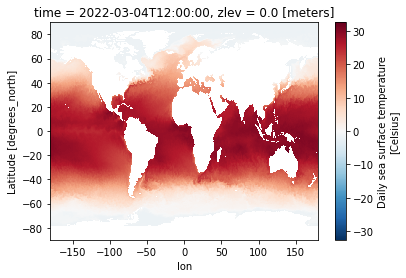

In [4]:
# Selecting one time step to plot
sst.isel(time=0).plot()

### Set the nodata value to grey

"bwr" is the name of the colormap that I chose for this image. You can change "bwr" to [any other colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html) you want. Ex. `plt.cm.get_cmap("viridis").copy()`

Grey can also be changed to any color. I like using `grey` because it is clear, but I often prefer a slightly lighter shade than the default, so I'll use the hexadecimal code `#c0c0c0`. (Example below in a comment)

In [5]:
# Extract the colormap that I want "bwr"
bwr_badgrey = plt.cm.get_cmap("bwr").copy()
bwr_badgrey.set_bad('grey')
# bwr_badgrey.set_bad('#c0c0c0')

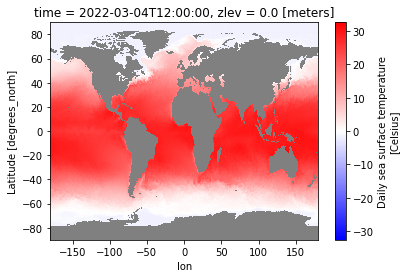

In [6]:
sst.isel(time=0).plot(cmap=bwr_badgrey)

## More detailed plots with cartopy

In [12]:
# Set the projection. PlateCarree is "regular" lat/lon
map_proj = ccrs.PlateCarree()
data_proj = ccrs.PlateCarree()

In [9]:
sst_AK = sst.sel(lon=slice(-180, -120), lat=slice(40, 75)).isel(time=0)

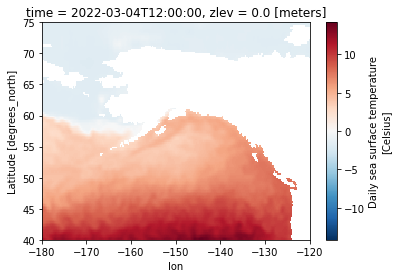

In [10]:
sst_AK.plot()

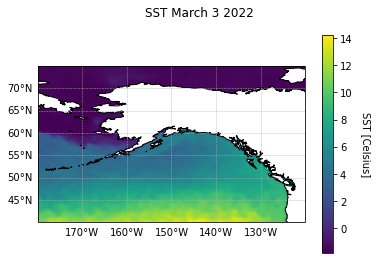

In [13]:
fig = plt.figure()
ax = plt.axes(projection=map_proj)

# Add the data to the plot
pc = ax.pcolormesh(sst_AK.lon, sst_AK.lat, sst_AK, transform=data_proj)

# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.5, linestyle='--', alpha=0.9)
gl.top_labels, gl.right_labels = False, False  
# the previous line to removes top and right gridlines labels, which overlap
# the colorbar

# Add the colorbar
cb = fig.colorbar(pc, extend='neither')
cb.set_label('SST [Celsius]', rotation=270, labelpad=18)

# Add a title
fig.suptitle('SST March 3 2022')

# Add coastlines
ax.coastlines()

### Transforming the map to another projection

Alaska is pretty far north, so we may want to use a map projection that is more accurate for that region. Looking through the [cartopy projection list](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html) it looks like an Albers Equal Area projection minimizes distortion in northern latitudes, so let's use that one.

In [21]:
# Define a new map projection
map_proj = ccrs.AlbersEqualArea(central_longitude=-150)

_Copy and paste the exact same code as above_

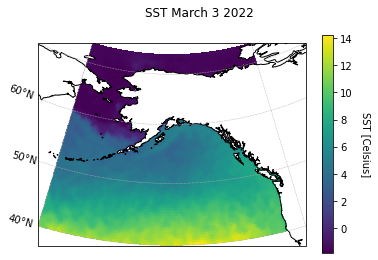

In [22]:
fig = plt.figure()
ax = plt.axes(projection=map_proj)

# Add the data to the plot
pc = ax.pcolormesh(sst_AK.lon, sst_AK.lat, sst_AK, transform=data_proj)

# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.5, linestyle='--', alpha=0.9)
gl.top_labels, gl.right_labels = False, False  
# the previous line to removes top and right gridlines labels, which overlap
# the colorbar

# Add the colorbar
cb = fig.colorbar(pc, extend='neither')
cb.set_label('SST [Celsius]', rotation=270, labelpad=18)

# Add a title
fig.suptitle('SST March 3 2022')

# Add coastlines
ax.coastlines()

Much less distorted!